# Gibbs sampling

A problem where we can define our conditional distributions as $P(X | Y) = f(y)$ and $P(Y|X) = g(x)$. The algorithm is very simply defined and the hard part is to properly define the target distributions. We initiate our sampling by randomly sample one of the variables, for instance, $y_0 = randomNorm$.

Iterate this for each sample, with $i$ being the current step:

- $x_i =$ random sample from $f(y_{i-1})$
- $y_i =$ random sample $g(x_{i})$
- We get those samples $x_i, y_i$

Now how do we define the conditional distributions? Formally conditional distributions could be defined as $P(A|B) = \frac{P(A, B)}{P(B)}$.

For instance, if we are trying to sample from a bivariate joint distribution $P(X, Y) \sim \mathcal{N}([\mu_x, \mu_y ], \Sigma)$ where $\Sigma$ is defined as $\begin{pmatrix} \sigma^2_x &  \rho \sigma_x \sigma_y \\  \rho \sigma_x \sigma_y & \sigma^2_y \end{pmatrix}$ 

This lets us define one of the conditionals as: $P(X|Y) \sim \mathcal{N}(\mu_x + \rho\sigma_x(y-\mu_y)/\sigma_y, (1-\rho²)\sigma^2_x)$

with $(1-\rho^2)\sigma^2_x = \sigma^2_x - \frac{\rho^2 \sigma^2_x \sigma^2_y}{\sigma^2_y}$ and $\mu_x + \rho\sigma_x(y-\mu_y)/\sigma_y = \mu_x +  \rho \sigma_x \sigma_y (y - \mu_x) / \sigma^2_y$

We can do the same for $P(Y|X)$ using the inverse parameters.

In [66]:
import math
from scipy.stats import multivariate_normal

def normal_dist(x, sig=1.5, mu=10):
    return (1/math.sqrt(2*math.pi*sig**2)) * math.exp(-(x - mu)**2/(2*sig**2))
def mixed_normal(x):
    return normal_dist(x, sig=0.8, mu=6) * 0.2 + normal_dist(x) * 0.8

mu = [0.8, 1.5]
sig = [[ 1. , -0.5], [-0.5,  1.5]]

def x_by_y(y):
    return np.random.normal(mu[0]+(sig[1][0]/sig[0][0])*(y-mu[1]), sig[0][0]-sig[1][0]**2/sig[1][1])
def y_by_x(x):
    return np.random.normal(mu[1]+(sig[0][1]/sig[1][1])*(x-mu[0]), sig[1][1]-sig[0][1]**2/sig[0][0])

In [67]:
#Sampling methods
import numpy as np

def gibbs(f, g, length=250):
    y = np.random.normal(size=1)
    samples_X, samples_Y = [], []

    for i in range(length):
        x = f(y)
        y = g(x)
        samples_X.append(x)
        samples_Y.append(y)
    return samples_X, samples_Y

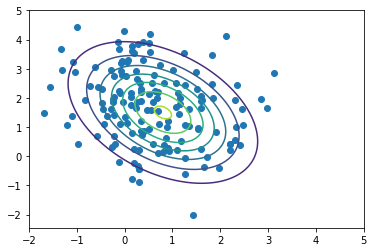

In [68]:
import matplotlib.pyplot as plt
tx = np.linspace(-2, 5, 100)
ty = np.linspace(-2, 5, 100)
tz = [[multivariate_normal(mu, sig).pdf((x, y)) for x in tx] for y in ty]

plt.contour(tx, ty, tz, label='target distribution')
sx, sy = gibbs(x_by_y, y_by_x, length=150)
plt.scatter(sx, sy, label='sampled distribution')
#plt.legend()
plt.show()